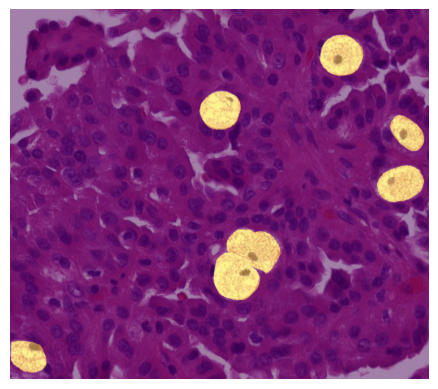

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/home/mukesh/dev/MoNuSAC/data/train/masks/TCGA-5P-A9K0-01Z-00-DX1/0/in.png")
mask = Image.open("/home/mukesh/dev/MoNuSAC/data/train/masks/TCGA-5P-A9K0-01Z-00-DX1/0/3.png")

plt.imshow(img)
plt.imshow(mask, alpha=0.5)
plt.axis("off")
plt.show()
